# Importing libraries 

In [1]:
import pandas as pd

# Getting data from Github

In [2]:
url="https://raw.githubusercontent.com/AJAYVISWA22/Uber-Fare-Prediction/main/Data/uber.csv"
df=pd.read_csv(url)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Exploring the data 

In [150]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
#df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])

#df1['year']=df1['pickup_datetime'].dt.year
#df1['month']=df1['pickup_datetime'].dt.month
#df1['day']=df1['pickup_datetime'].dt.day


In [151]:
df1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


## Unique Values



In [153]:
for i in df1.columns:
    print(i,len(df1[i].unique()))

Unnamed: 0 200000
key 200000
fare_amount 1244
pickup_datetime 196629
pickup_longitude 71066
pickup_latitude 83835
dropoff_longitude 76895
dropoff_latitude 90586
passenger_count 8


In [154]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


# Wrong values

## Location

New yorks latitude and longitude ranges from:
- Latitude	40° 30′ N to 45° 1′ N
- Longitude	71° 51′ W to 79° 46′ W

values exceeds this are wrong values

In [155]:
df1["pickup_latitude"].min(),df1["pickup_latitude"].max()

(np.float64(-74.01551500000001), np.float64(1644.421482))

In [54]:
df1["pickup_longitude"].min(),df1["pickup_longitude"].max()

(np.float64(-1340.64841), np.float64(57.418457))

In [64]:
df1['dropoff_latitude'].min(),df1["dropoff_latitude"].max()

(np.float64(-881.9855130000001), np.float64(872.6976279999999))

In [65]:
df1["dropoff_longitude"].min(),df1["dropoff_longitude"].max()


(np.float64(-3356.6663), np.float64(1153.5726029999998))

In [52]:
wrong_lat = df1.loc[df1["pickup_latitude"].idxmax()]
wrong_lat

Unnamed: 0                               33249845
key                  2011-11-05 00:22:00.00000051
fare_amount                                  15.7
pickup_datetime           2011-11-05 00:22:00 UTC
pickup_longitude                      -1340.64841
pickup_latitude                       1644.421482
dropoff_longitude                      -3356.6663
dropoff_latitude                       872.697628
passenger_count                                 1
Name: 75851, dtype: object

In row 75851 has wrong values 
- pickup_longitude                      -1340.64841
- pickup_latitude                       1644.421482
- dropoff_longitude                      -3356.6663
- dropoff_latitude                       872.697628

In [60]:
wrong_lon=df1.loc[df1['pickup_longitude'].idxmax()]
wrong_lon

Unnamed: 0                                23566642
key                  2011-05-18 13:24:00.000000213
fare_amount                                   16.1
pickup_datetime            2011-05-18 13:24:00 UTC
pickup_longitude                         57.418457
pickup_latitude                        1292.016128
dropoff_longitude                      1153.572603
dropoff_latitude                       -881.985513
passenger_count                                  1
Name: 91422, dtype: object

In [78]:
columns_of_interest = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Combine the columns into a single DataFrame to find unique rows
unique_values_df = df1[columns_of_interest].drop_duplicates()

# Count unique values for each column
unique_counts = unique_values_df.nunique()

print("Unique values count for each column:")
print(unique_counts)

print("\nUnique rows:")
print(unique_values_df)

Unique values count for each column:
pickup_latitude      83835
pickup_longitude     71066
dropoff_latitude     90585
dropoff_longitude    76894
dtype: int64

Unique rows:
        pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
0             40.738354        -73.999817         40.723217         -73.999512
1             40.728225        -73.994355         40.750325         -73.994710
2             40.740770        -74.005043         40.772647         -73.962565
3             40.790844        -73.976124         40.803349         -73.965316
4             40.744085        -73.925023         40.761247         -73.973082
...                 ...               ...               ...                ...
199995        40.739367        -73.987042         40.740297         -73.986525
199996        40.736837        -73.984722         40.739620         -74.006672
199997        40.756487        -73.986017         40.692588         -73.858957
199998        40.725452        -73.997

In [168]:
valid_latitude_range = (40.5, 45.0)  # From 40° 30′ N to 45° 1′ N
valid_longitude_range = (-79.8, -71.85)  # From 79° 46′ W to 71° 51′ W


invalid_rows_loc = df[
    (df['pickup_latitude'] < valid_latitude_range[0]) | (df['pickup_latitude'] > valid_latitude_range[1]) |
    (df['pickup_longitude'] < valid_longitude_range[0]) | (df['pickup_longitude'] > valid_longitude_range[1]) |
    (df['dropoff_latitude'] < valid_latitude_range[0]) | (df['dropoff_latitude'] > valid_latitude_range[1]) |
    (df['dropoff_longitude'] < valid_longitude_range[0]) | (df['dropoff_longitude'] > valid_longitude_range[1])
]

# Print the rows with invalid latitude and longitude values

invalid_rows_loc

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.0,0.000000,0.000000,0.000000,1
11,6379048,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00 UTC,0.0,0.000000,0.000000,0.000000,1
65,21993993,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00 UTC,0.0,0.000000,0.000000,0.000000,1
92,1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00 UTC,0.0,0.000000,0.000000,0.000000,1
120,17358122,2010-08-20 19:39:48.0000003,6.5,2010-08-20 19:39:48 UTC,0.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
199724,46007628,2013-10-11 11:25:41.0000004,7.5,2013-10-11 11:25:41 UTC,0.0,0.000000,0.000000,0.000000,1
199880,35013970,2014-02-22 06:45:46.0000002,6.5,2014-02-22 06:45:46 UTC,0.0,0.000000,0.000000,0.000000,1
199883,44115598,2012-09-10 17:39:00.00000090,12.5,2012-09-10 17:39:00 UTC,0.0,0.000000,0.000000,0.000000,2
199936,44787414,2012-07-21 16:19:00.00000099,4.1,2012-07-21 16:19:00 UTC,-736.4,40.774307,-73.982215,40.769672,5


## Fare Amount

fare_amount should not be less than 0

In [172]:
aa=df1[(df1['fare_amount'] <= 0)]
aa 

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,25344154,2015-04-22 23:25:07.0000008,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,22994576,2010-03-20 02:59:51.0000002,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,30260042,2015-03-03 23:07:41.0000008,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,51325304,2010-02-11 21:47:10.0000001,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,50284253,2015-05-01 14:43:02.0000004,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,10649069,2015-01-04 03:51:13.0000002,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,26673143,2010-03-09 08:26:10.0000006,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,10267585,2010-03-12 08:49:10.0000002,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,51135168,2015-03-20 21:31:14.0000007,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,21688700,2010-03-09 20:25:10.0000002,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


## Passenger Count

Passenger Count should not be 0

In [173]:
aa=df1[(df1['passenger_count'] <= 0) ]
aa 

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,2137942,2011-08-05 07:03:08.0000001,10.1,2011-08-05 07:03:08 UTC,-74.013900,40.707800,-73.992300,40.749300,0
908,8484351,2011-09-06 12:25:19.0000002,11.7,2011-09-06 12:25:19 UTC,-73.981000,40.764600,-73.962900,40.778400,0
926,32941306,2012-03-26 18:11:24.0000002,3.3,2012-03-26 18:11:24 UTC,-73.979978,40.765821,-73.983894,40.766873,0
2000,12591041,2012-04-20 15:07:57.0000003,15.7,2012-04-20 15:07:57 UTC,-73.975285,40.750138,-73.974729,40.783151,0
3011,39400625,2012-01-07 19:19:08.0000004,6.1,2012-01-07 19:19:08 UTC,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...,...,...
196797,26965490,2011-01-17 15:52:26.0000002,3.3,2011-01-17 15:52:26 UTC,-74.000760,40.757637,-74.004852,40.751947,0
197103,49116579,2011-12-10 15:33:12.0000008,7.3,2011-12-10 15:33:12 UTC,0.000000,0.000000,0.000000,0.000000,0
198872,12988511,2011-09-20 19:55:05.0000001,5.7,2011-09-20 19:55:05 UTC,-73.980300,40.742800,-73.967900,40.755600,0
198902,54393172,2011-08-22 21:10:56.0000002,12.1,2011-08-22 21:10:56 UTC,-73.996700,40.737200,-74.008500,40.704000,0


In [206]:
aa=df1[(df1['passenger_count'] >=7 ) ]
aa

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,35893772,2010-12-28 08:20:00.0000001,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [ ]:
wrong_pc = df2.loc[df2['passenger_count'].idxmax()]
wrong_pc

In [175]:
pc_fa=df1[(df1['passenger_count'] <= 0) | (df1['fare_amount']<=0) ]
pc_fa

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,2137942,2011-08-05 07:03:08.0000001,10.1,2011-08-05 07:03:08 UTC,-74.013900,40.707800,-73.992300,40.749300,0
908,8484351,2011-09-06 12:25:19.0000002,11.7,2011-09-06 12:25:19 UTC,-73.981000,40.764600,-73.962900,40.778400,0
926,32941306,2012-03-26 18:11:24.0000002,3.3,2012-03-26 18:11:24 UTC,-73.979978,40.765821,-73.983894,40.766873,0
2000,12591041,2012-04-20 15:07:57.0000003,15.7,2012-04-20 15:07:57 UTC,-73.975285,40.750138,-73.974729,40.783151,0
3011,39400625,2012-01-07 19:19:08.0000004,6.1,2012-01-07 19:19:08 UTC,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...,...,...
197103,49116579,2011-12-10 15:33:12.0000008,7.3,2011-12-10 15:33:12 UTC,0.000000,0.000000,0.000000,0.000000,0
197172,44172118,2015-02-13 07:35:32.0000002,0.0,2015-02-13 07:35:32 UTC,0.000000,0.000000,0.000000,0.000000,5
198872,12988511,2011-09-20 19:55:05.0000001,5.7,2011-09-20 19:55:05 UTC,-73.980300,40.742800,-73.967900,40.755600,0
198902,54393172,2011-08-22 21:10:56.0000002,12.1,2011-08-22 21:10:56 UTC,-73.996700,40.737200,-74.008500,40.704000,0


we  can make the wrong values as null or else 
we can use some models to predict the correct values based on the  remaining datas

In [180]:
# Remove the wrong  rows from df1
valid1 = pd.concat([df1,pc_fa ]).drop_duplicates(keep=False).reset_index()
valid1

,index,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...,...
199264,199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199265,199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199266,199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199267,199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [179]:
# checking the dataframe 

valid1[(valid1['passenger_count'] <= 0) | (valid1['fare_amount']<=0) ]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


# Treating null Values

In [189]:
df2=df1.copy()

In [190]:
df2.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

## Changing 0 as null values

Data has some values a zero converting them to null

In [191]:
# fare amount and  passenger count should not be zero or rless than 
# So making them as null

df2['fare_amount'] = df2['fare_amount'].apply(lambda x: np.nan if x<=0 else x)
df2['passenger_count'] = df2['passenger_count'].apply(lambda x: np.nan if x<=0 else x)


In [193]:
df2.isnull().sum()

Unnamed: 0             0
key                    0
fare_amount           22
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      1
dropoff_latitude       1
passenger_count      709
dtype: int64

In [245]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.136233e+01,9.896580e+00,0.010000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,200000.0,-7.252493e+01,1.311838e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,200000.0,3.992369e+01,6.795398e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.688080e+00,1.382959e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [196]:
null_rows = df2[df2[['dropoff_longitude', 'dropoff_latitude']].isnull().any(axis=1)]
null_rows


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,NaN


In [197]:
df2['dropoff_latitude']=df2['dropoff_latitude'].fillna(0)
df2['dropoff_longitude']=df2['dropoff_longitude'].fillna(0)

In [198]:
df2.isnull().sum()

Unnamed: 0             0
key                    0
fare_amount           22
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      709
dtype: int64

In [201]:
df2["fare_amount"].mean(),df2['fare_amount'].median(),df2['fare_amount'].mode()

(np.float64(11.362649491444062),
 np.float64(8.5),
 0    6.5
 Name: fare_amount, dtype: float64)

In [202]:
df2['fare_amount'].max(),df2['fare_amount'].min()

(np.float64(499.0), np.float64(0.01))

In [203]:
df2["passenger_count"].mean(),df2['passenger_count'].median(),df2['passenger_count'].mode()

(np.float64(1.6905279214816524),
 np.float64(1.0),
 0    1.0
 Name: passenger_count, dtype: float64)

In [204]:
df2['passenger_count'].max(),df2['passenger_count'].min()

(np.float64(208.0), np.float64(1.0))

In [ ]:
df2['fare_amount'].fillna(df2['fare_amount'].median(),inplace=True)
df2['passenger_count'].fillna(df2['passenger_count'].mode().iloc[0], inplace=True)


One data in passenger_count is high compared to others that causes high skweness

In [242]:
wrong_pc = df2.loc[df2['passenger_count'].idxmax()]
wrong_pc

Unnamed: 0                              35893772
key                  2010-12-28 08:20:00.0000001
fare_amount                                 11.7
pickup_datetime          2010-12-28 08:20:00 UTC
pickup_longitude                      -73.937795
pickup_latitude                        40.758498
dropoff_longitude                     -73.937835
dropoff_latitude                       40.758415
passenger_count                            208.0
Name: 113038, dtype: object

In [246]:
# Find the index of the row with the wrong passenger count
index_wrong_pc = df2['passenger_count'].idxmax()

# Update the passenger count value at this index
df2.at[index_wrong_pc, 'passenger_count'] = 1

# Verify the change
print(df2.loc[index_wrong_pc])

Unnamed: 0                              35893772
key                  2010-12-28 08:20:00.0000001
fare_amount                                 11.7
pickup_datetime          2010-12-28 08:20:00 UTC
pickup_longitude                      -73.937795
pickup_latitude                        40.758498
dropoff_longitude                     -73.937835
dropoff_latitude                       40.758415
passenger_count                              1.0
Name: 113038, dtype: object


## Treated Null values

In [247]:
df2.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# Change in Datatypes

In [248]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.7+ MB


In [249]:
df3=df2.drop('key',axis=1)
df3

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0


## Extracting featues date and time

In [ ]:
#df2['pickup_datetime']=pd.to_datetime(df2['pickup_datetime'])

#df2['year']=df2['pickup_datetime'].dt.year
#df2['month']=df2['pickup_datetime'].dt.month
#df2['day']=df2['pickup_datetime'].dt.day

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,200000.0,-7.252493e+01,1.311838e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,200000.0,3.992369e+01,6.795398e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


# Skewness Handling

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
def plot(df,column):

    sampled_df = df.sample(n=min(1000, len(df)))
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=sampled_df,x=column)
    plt.title(f"Outlier of {column}")

    plt.subplot(1,3,2)
    sns.histplot(data=sampled_df,x=column)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=sampled_df,x=column)
    plt.title(f'violin Plot for {column}')

    plt.show()


In [252]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  200000 non-null  float64
 6   dropoff_latitude   200000 non-null  float64
 7   passenger_count    200000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.2+ MB


In [105]:
df2.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

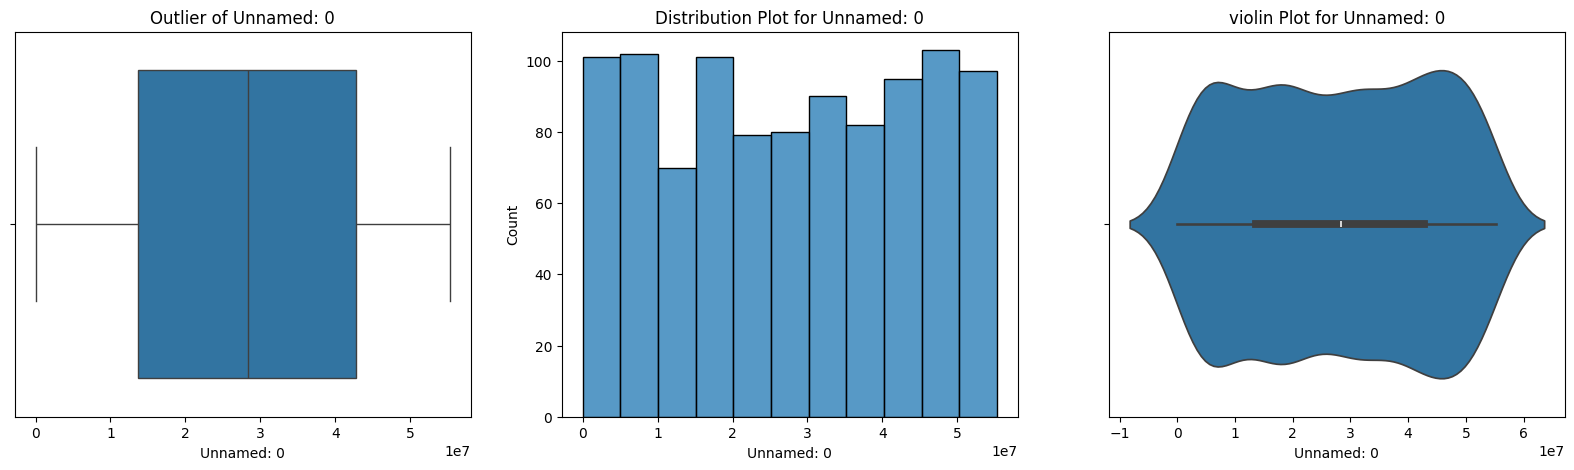

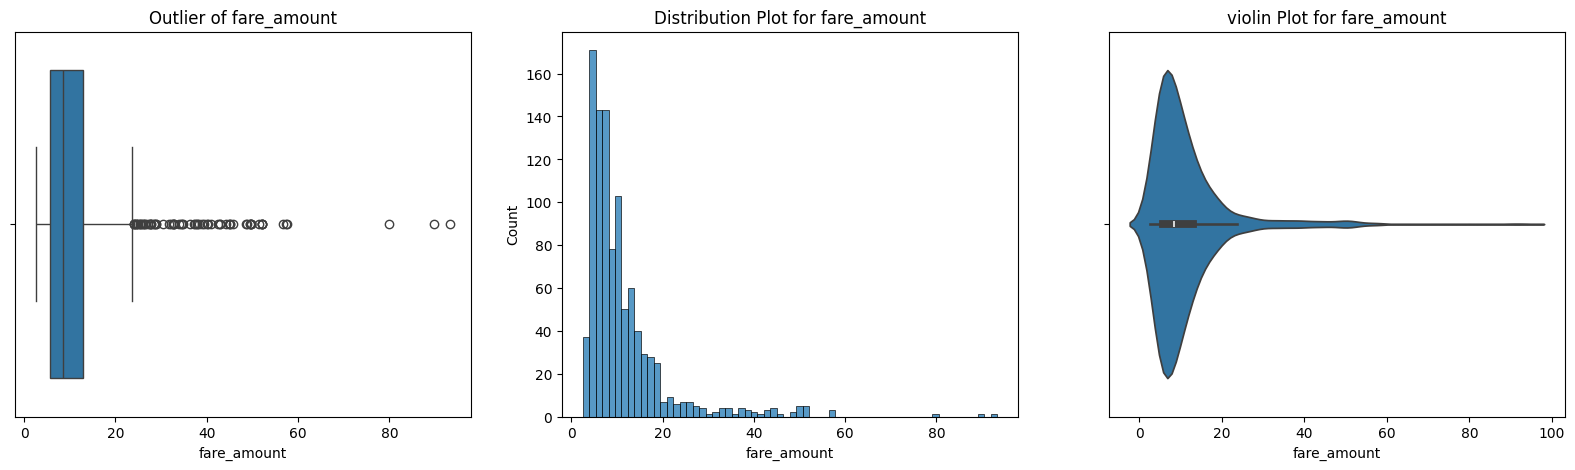

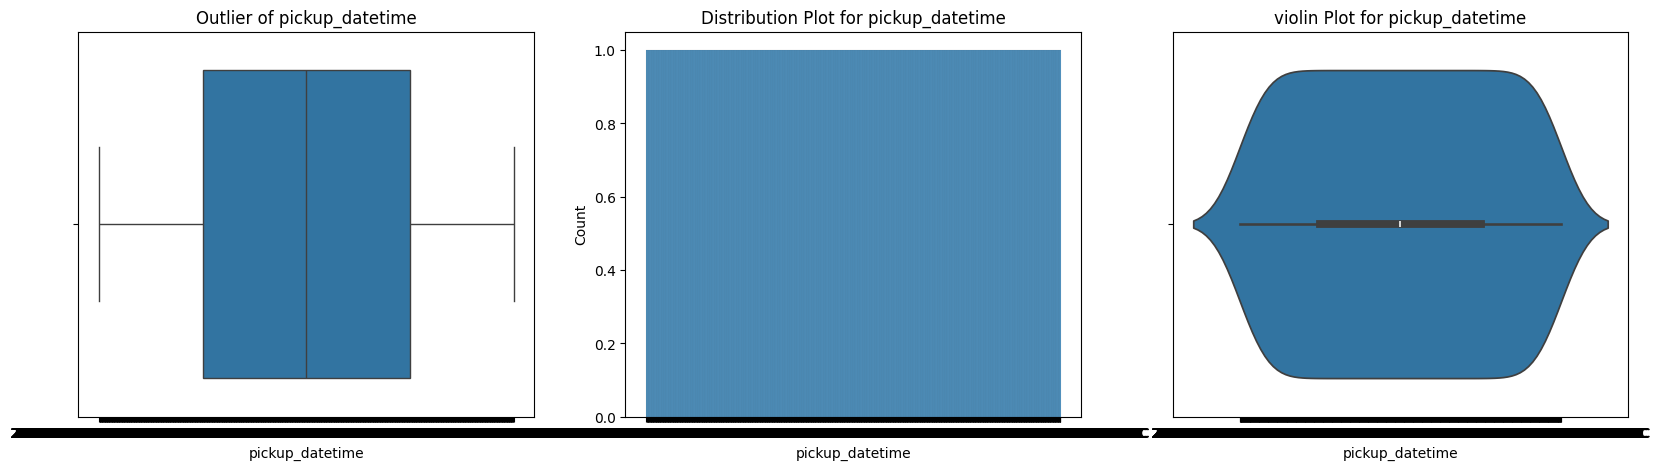

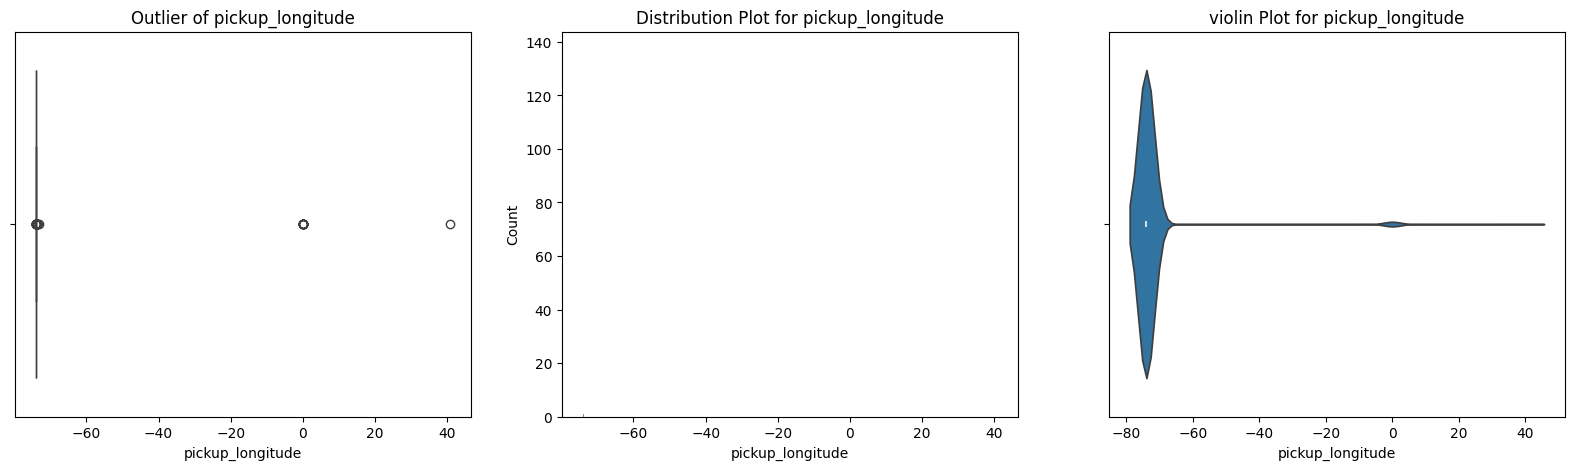

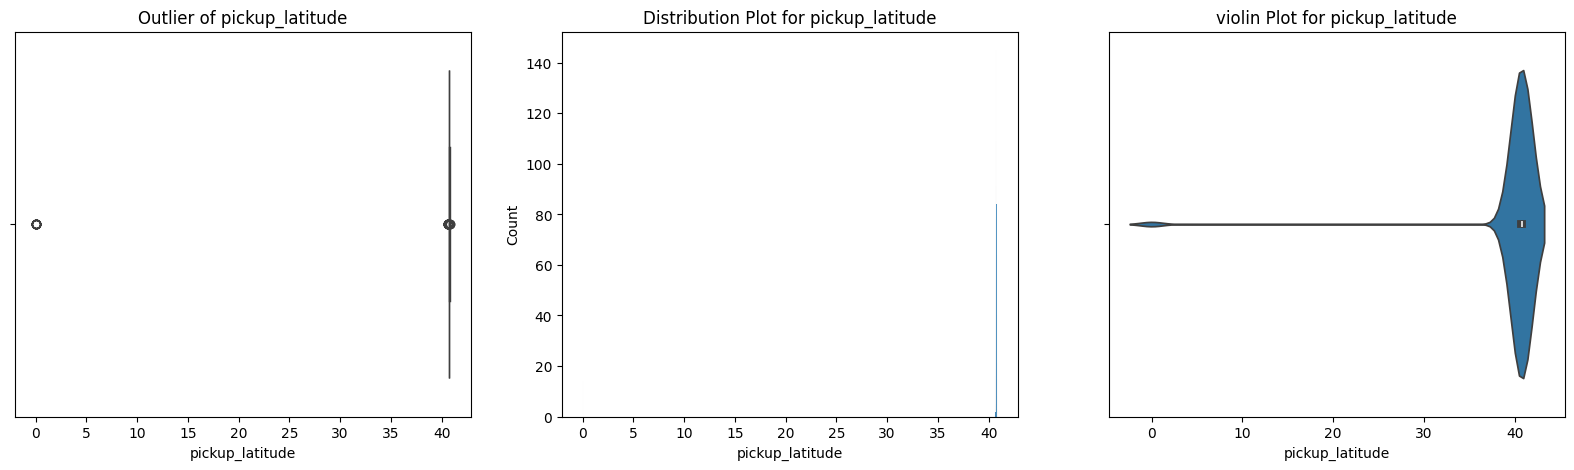

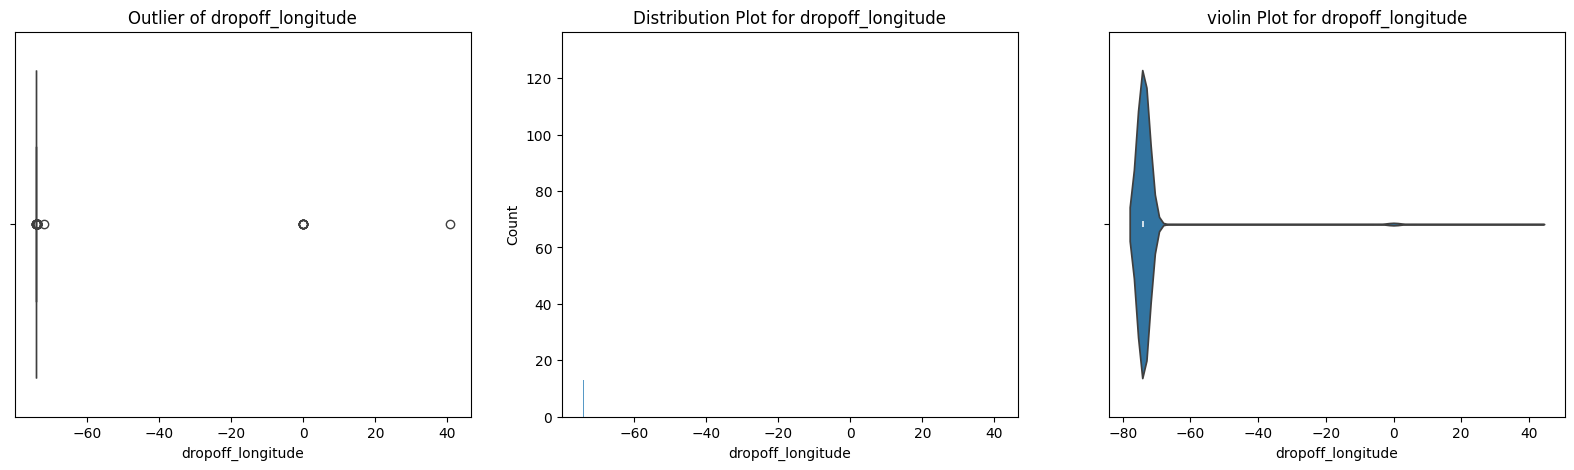

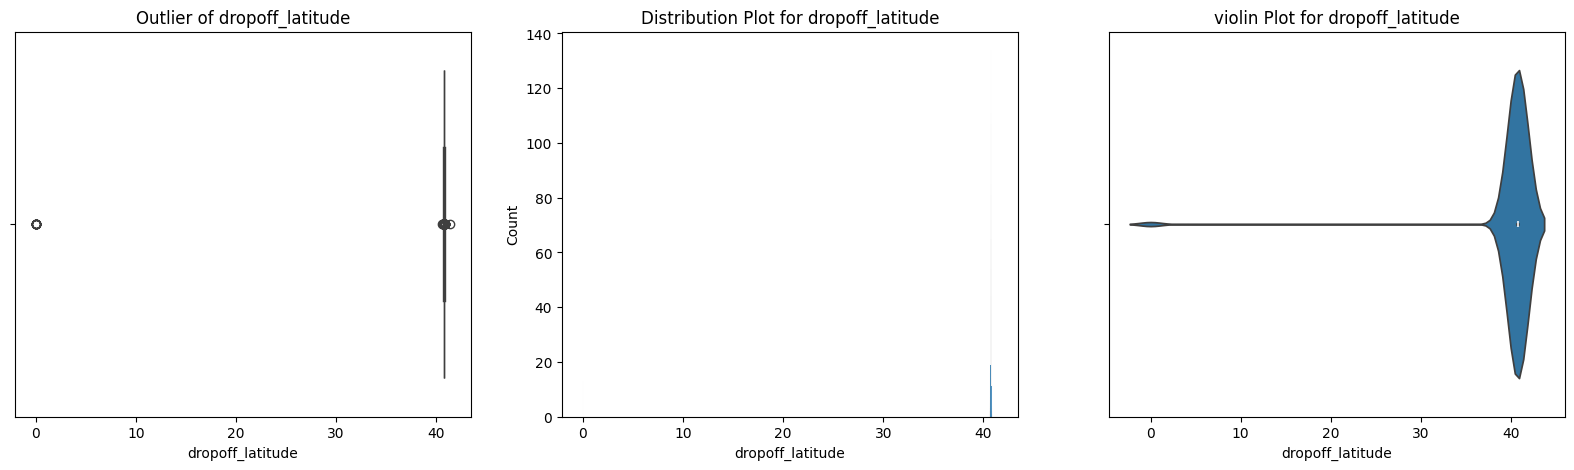

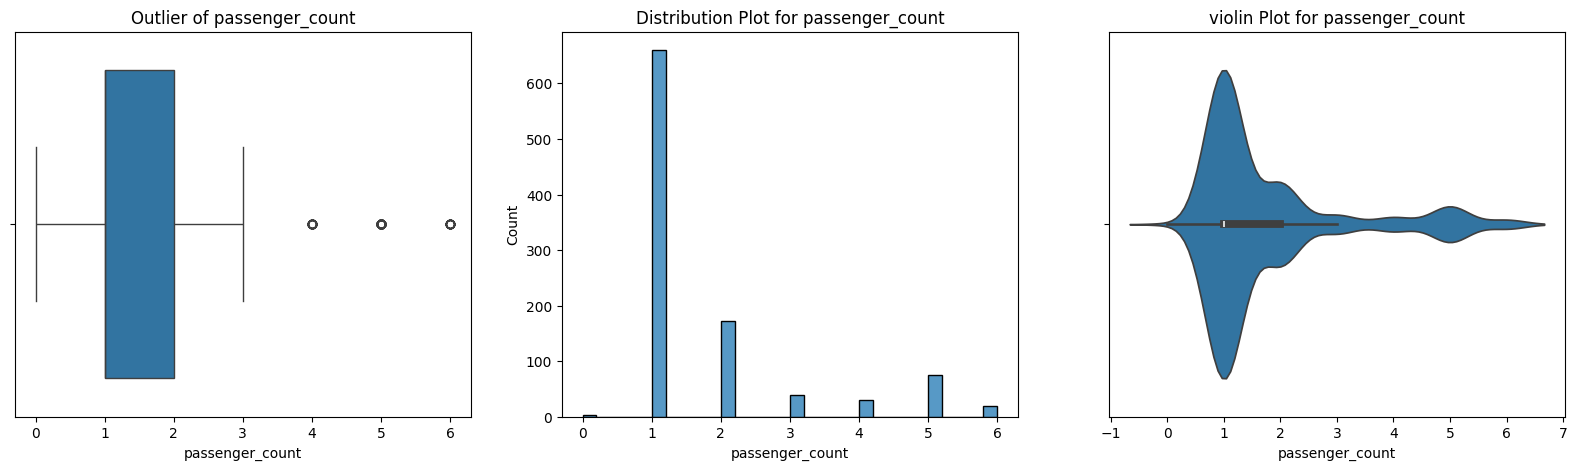

In [106]:
for i in df2.columns:
    plot(df2,i)

We can see that fare_amount,'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',passenger_count are skwed

## Plots without sampling

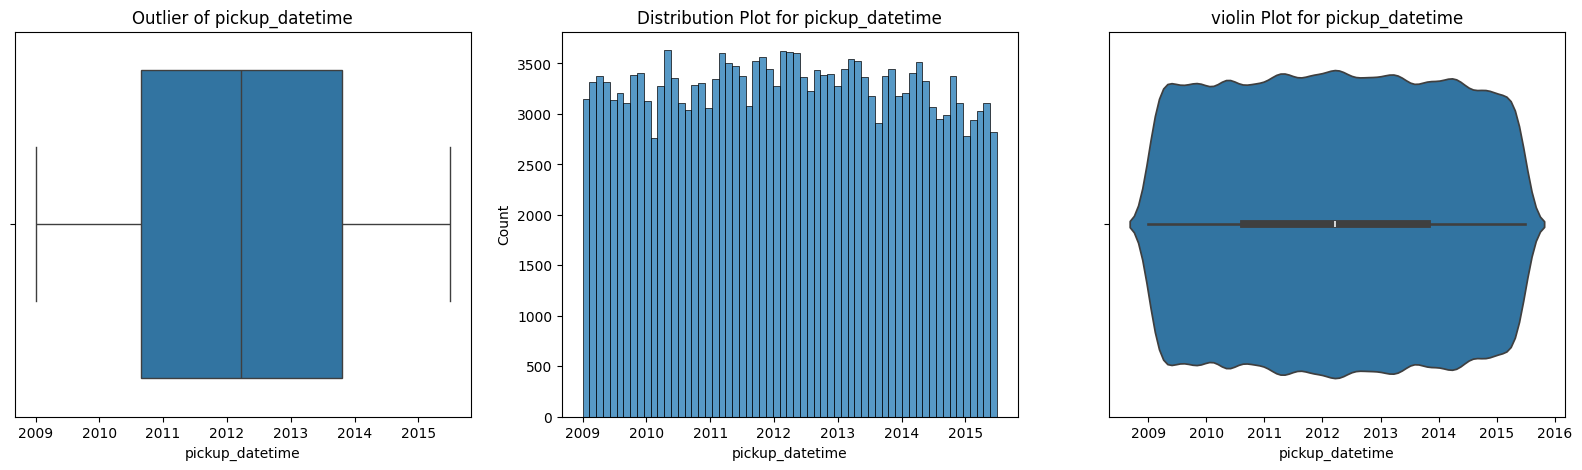

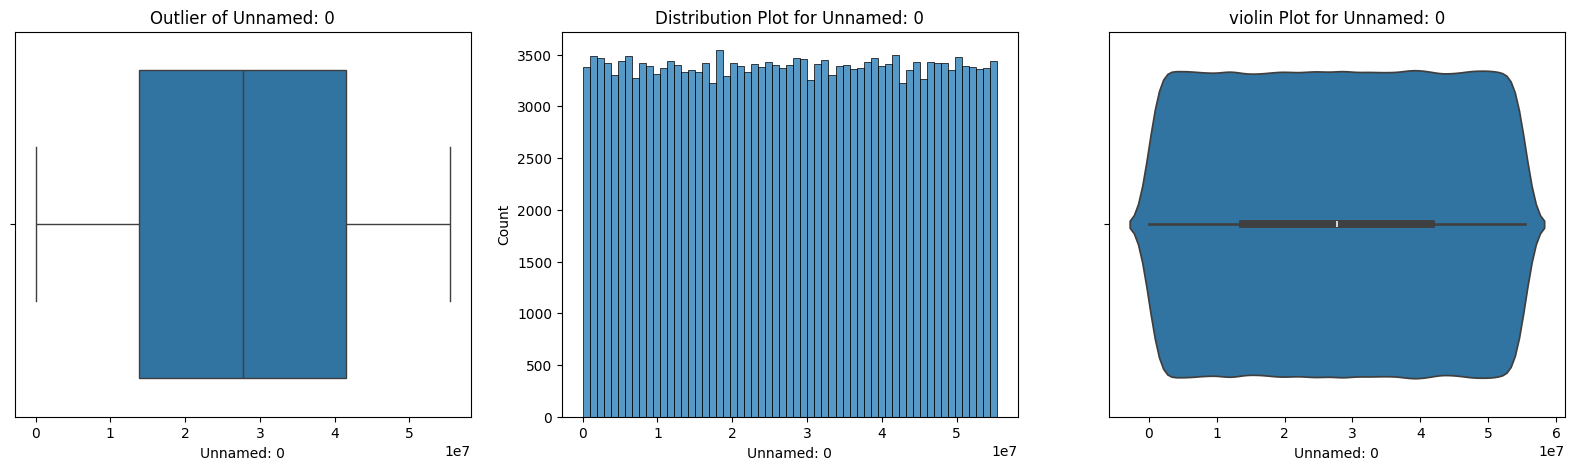

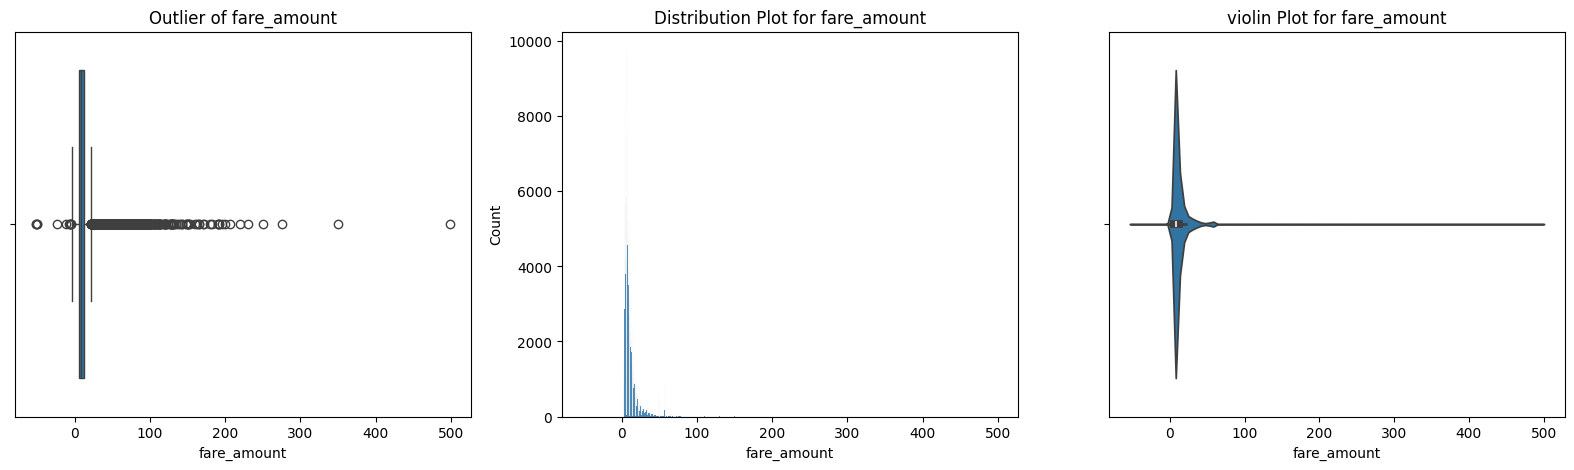

fare_amount,'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',passenger_count

## Finding best method for skewd

In [253]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [254]:
df4=df3.copy()
df4

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0


In [255]:
def plot_skewd(df,columns):
    
    # Log Transformation
    df['log_fare_amount'] = np.log1p(df[columns])

    # Square Root Transformation
    df['sqrt_fare_amount'] = np.sqrt(df[columns])

    # Box-Cox Transformation
    df['boxcox_fare_amount'], _ = boxcox(df[columns] + 1)  # Adding 1 to handle zero values

    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    df['yeojohnson_fare_amount'] = pt.fit_transform(df[[columns]])

    # Quantile Transformation
    qt = QuantileTransformer(output_distribution='normal')
    df['quantile_fare_amount'] = qt.fit_transform(df[[columns]])

    plt.figure(figsize=(20, 10))

    # Original Distribution
    plt.subplot(2, 3, 1)
    sns.histplot(df[columns], kde=True)
    plt.title('Original Distribution')

    # Log Transformation
    plt.subplot(2, 3, 2)
    sns.histplot(df['log_fare_amount'], kde=True)
    plt.title('Log Transformation')

    # Square Root Transformation
    plt.subplot(2, 3, 3)
    sns.histplot(df['sqrt_fare_amount'], kde=True)
    plt.title('Square Root Transformation')

    # Box-Cox Transformation
    plt.subplot(2, 3, 4)
    sns.histplot(df['boxcox_fare_amount'], kde=True)
    plt.title('Box-Cox Transformation')

    # Yeo-Johnson Transformation
    plt.subplot(2, 3, 5)
    sns.histplot(df['yeojohnson_fare_amount'], kde=True)
    plt.title('Yeo-Johnson Transformation')

    # Quantile Transformation
    plt.subplot(2, 3, 6)
    sns.histplot(df['quantile_fare_amount'], kde=True)
    plt.title('Quantile Transformation')

    plt.tight_layout()
    plt.show()


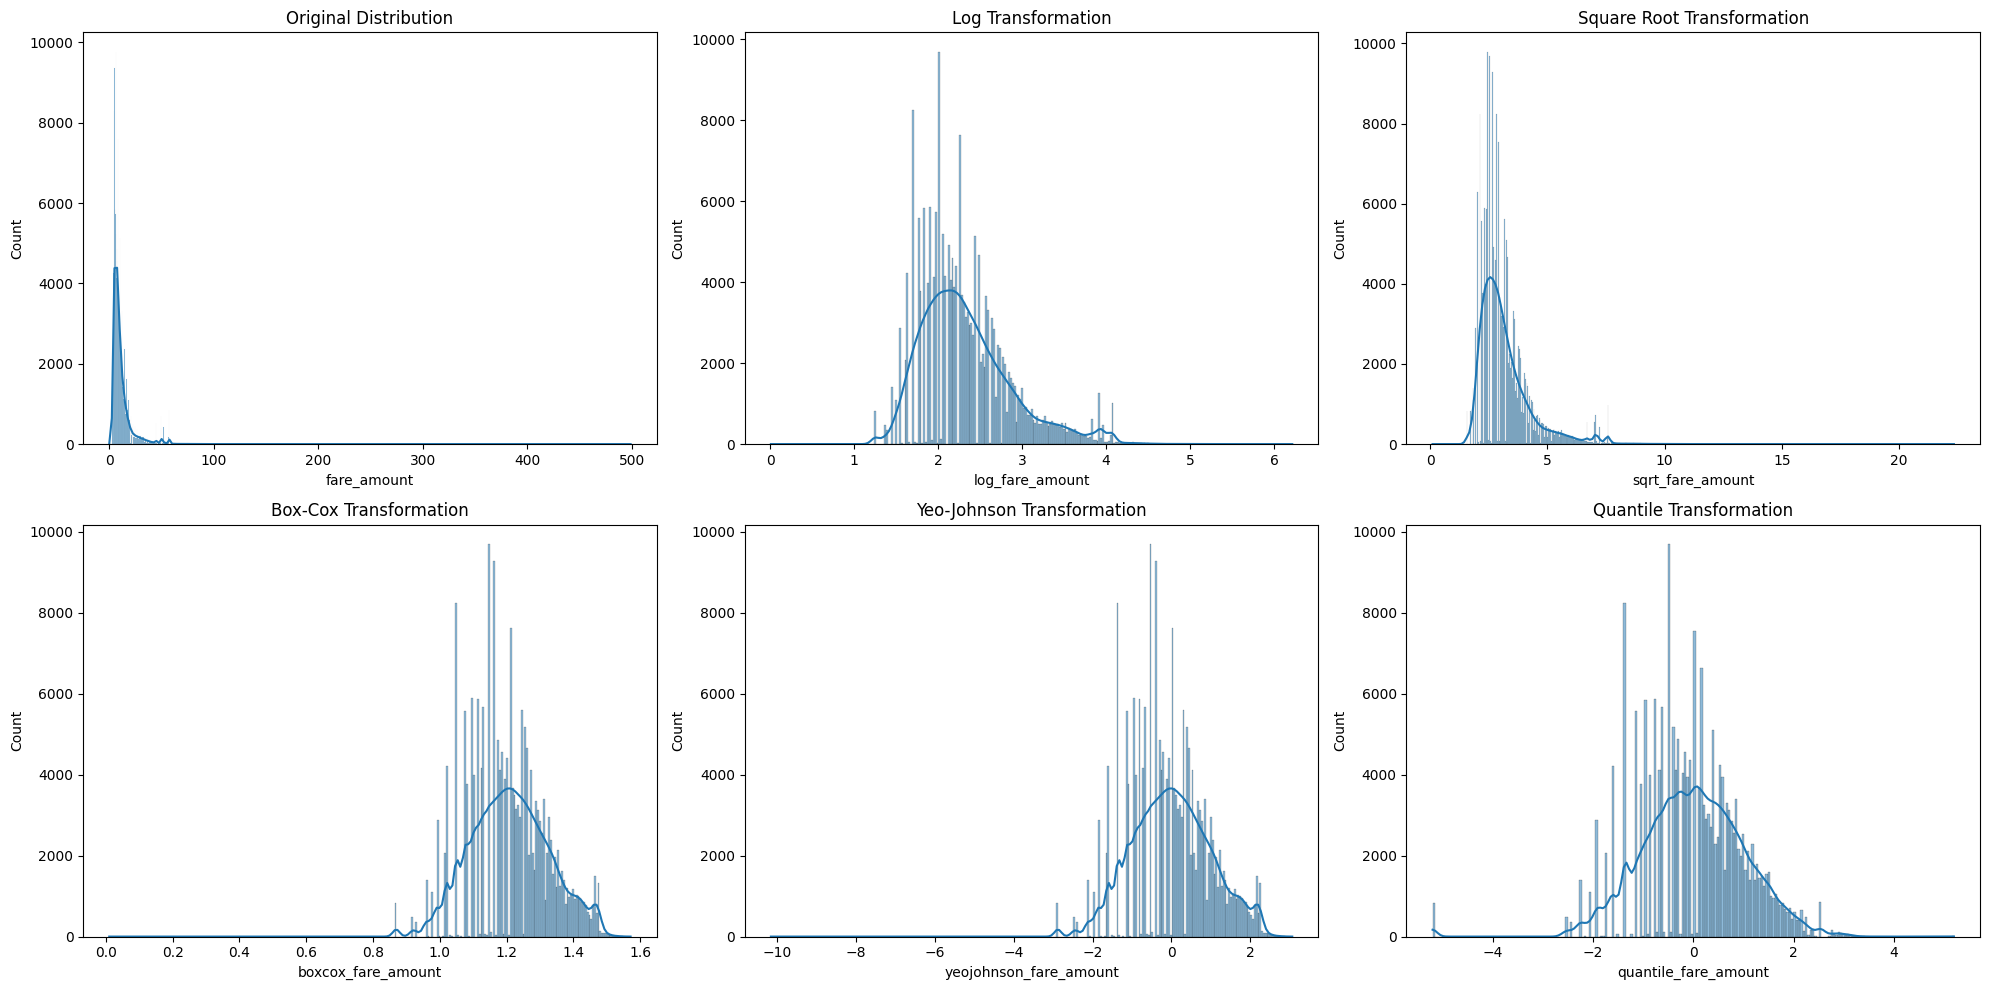

In [260]:
plot_skewd(df4,"fare_amount")

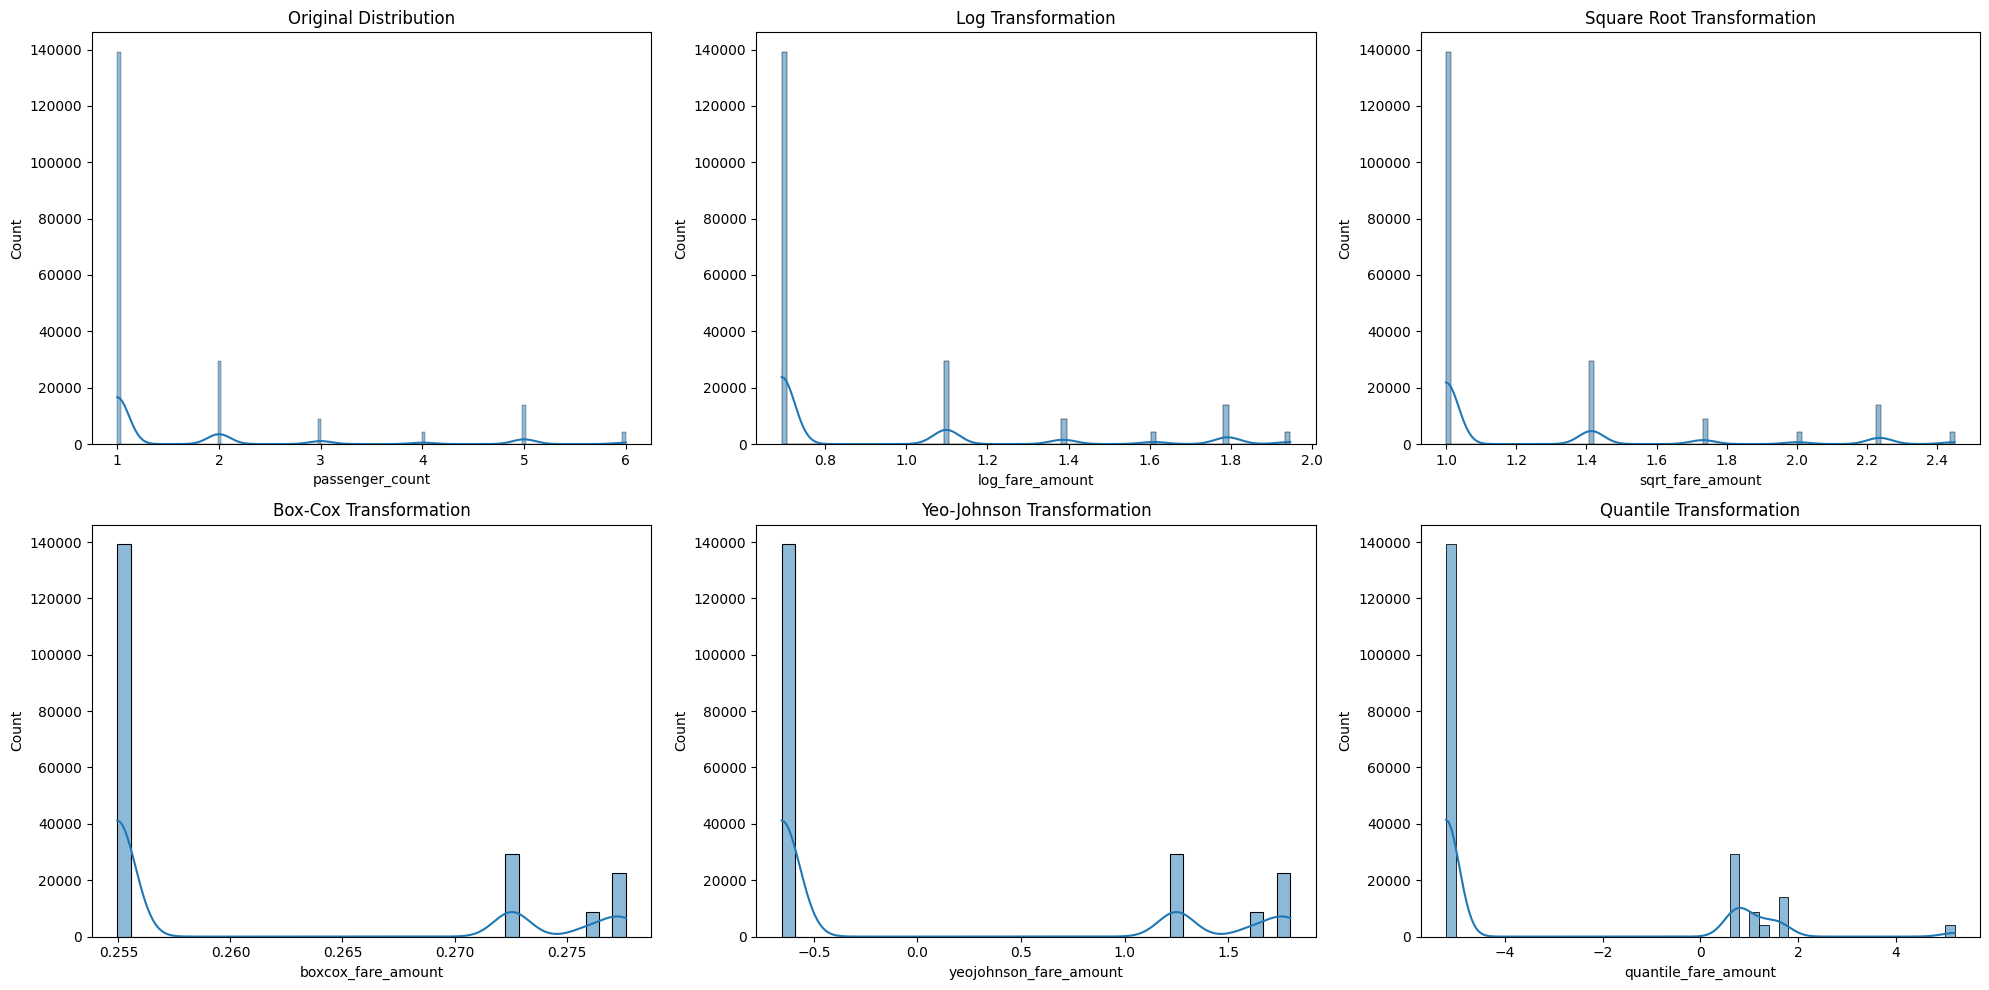

In [263]:
plot_skewd(df4,'passenger_count')

In [258]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              200000 non-null  int64  
 1   fare_amount             200000 non-null  float64
 2   pickup_datetime         200000 non-null  object 
 3   pickup_longitude        200000 non-null  float64
 4   pickup_latitude         200000 non-null  float64
 5   dropoff_longitude       200000 non-null  float64
 6   dropoff_latitude        200000 non-null  float64
 7   passenger_count         200000 non-null  float64
 8   log_fare_amount         200000 non-null  float64
 9   sqrt_fare_amount        200000 non-null  float64
 10  boxcox_fare_amount      200000 non-null  float64
 11  yeojohnson_fare_amount  200000 non-null  float64
 12  quantile_fare_amount    200000 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 19.8+ MB


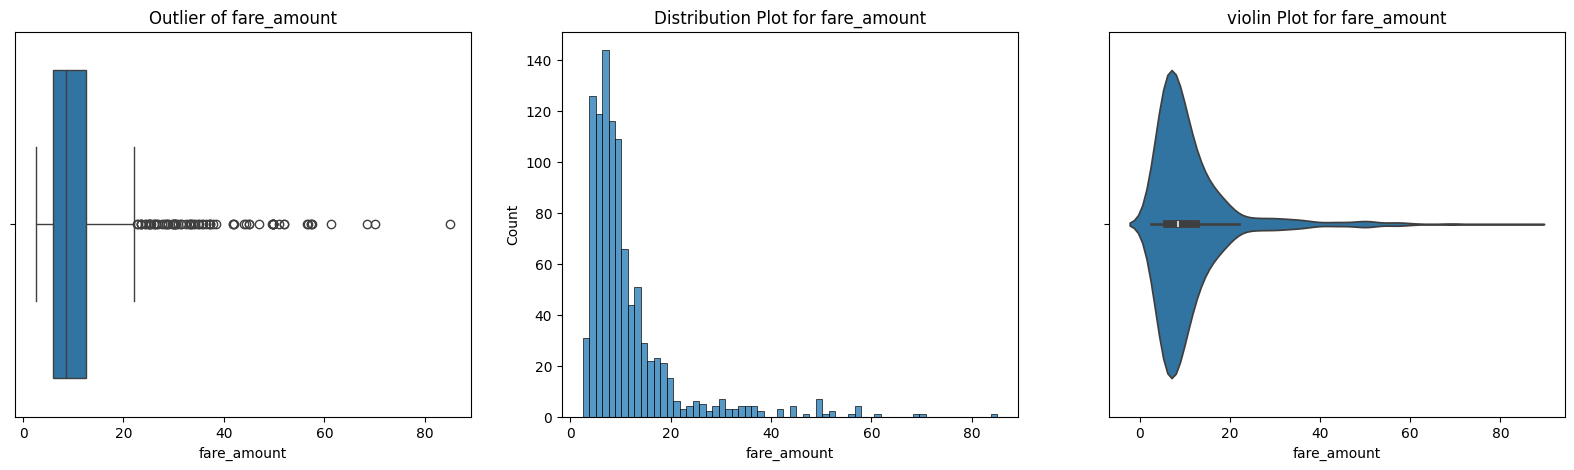

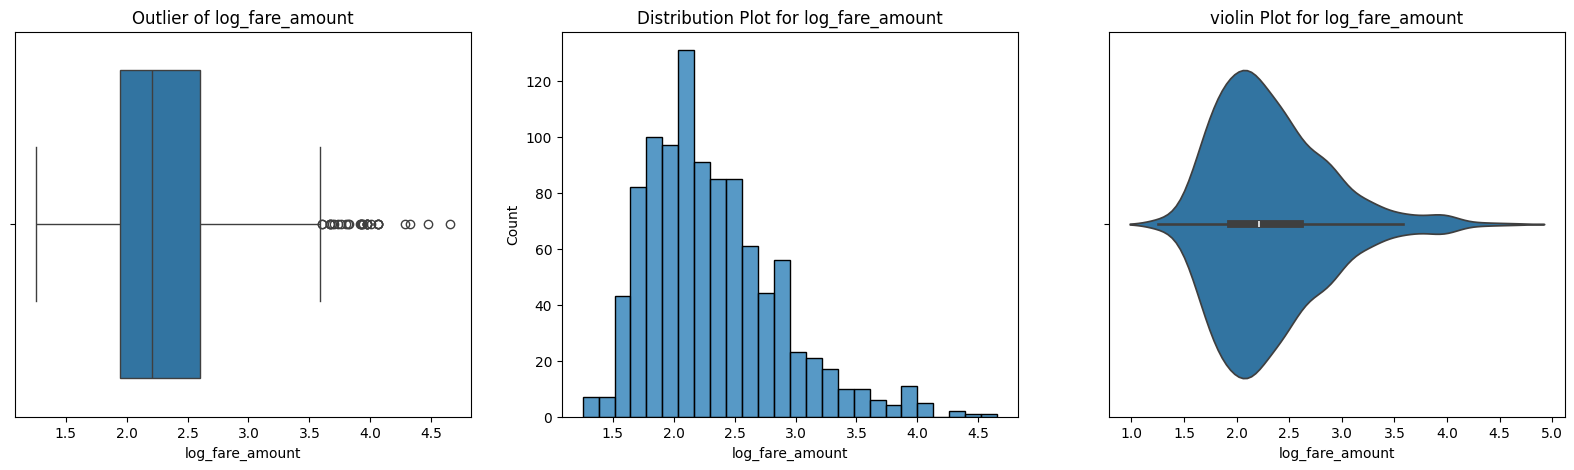

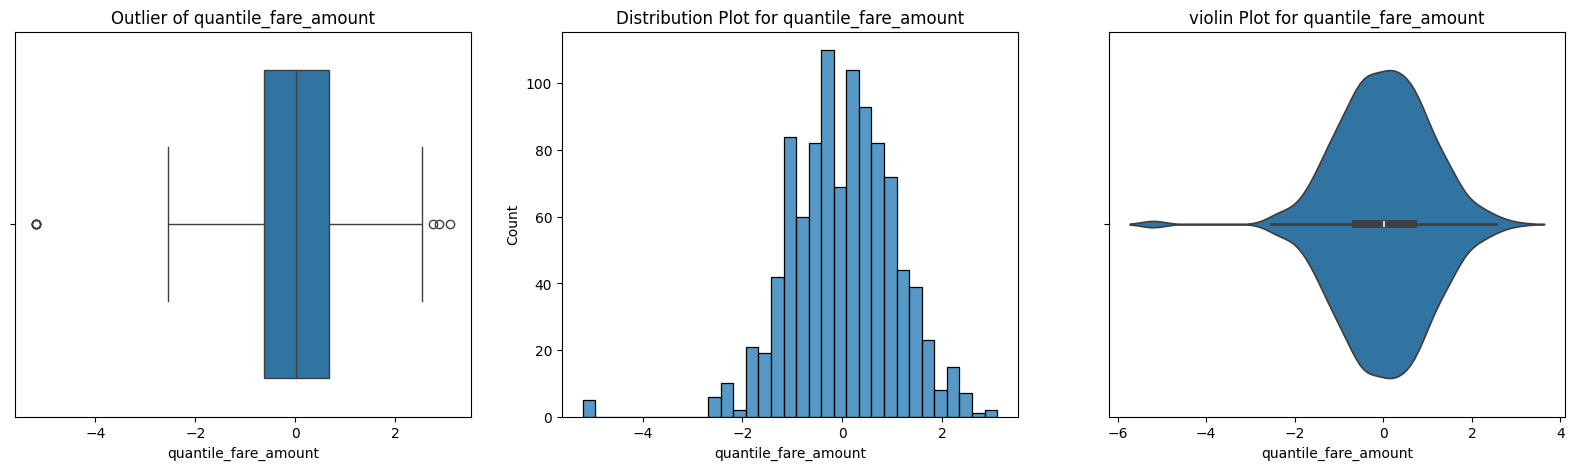

In [262]:
for i in ["fare_amount","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

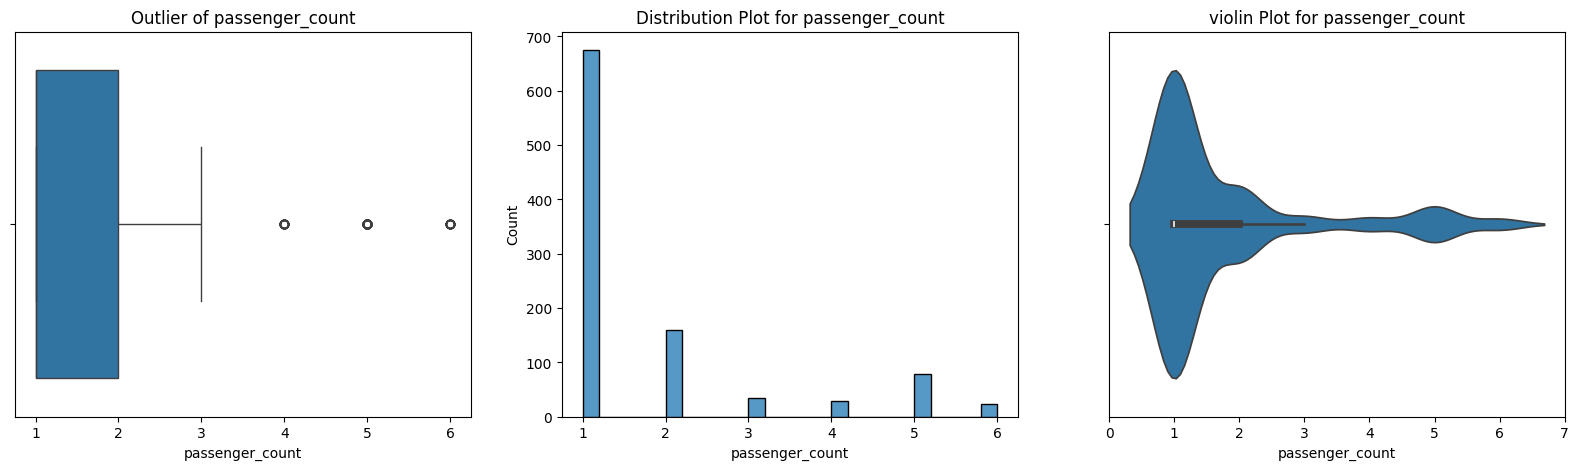

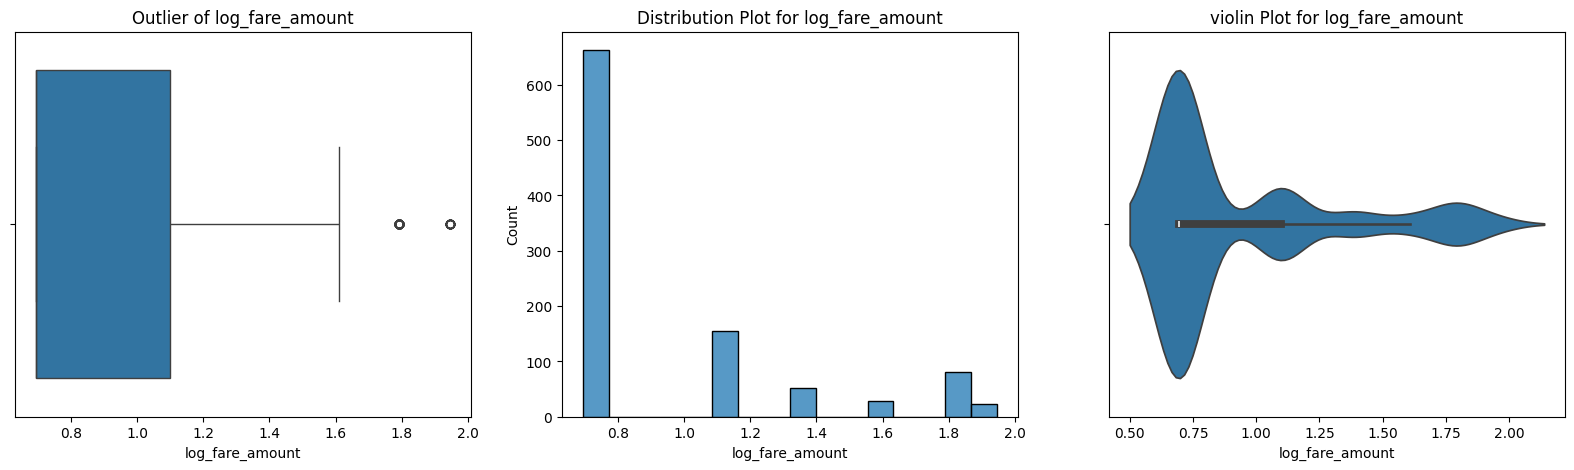

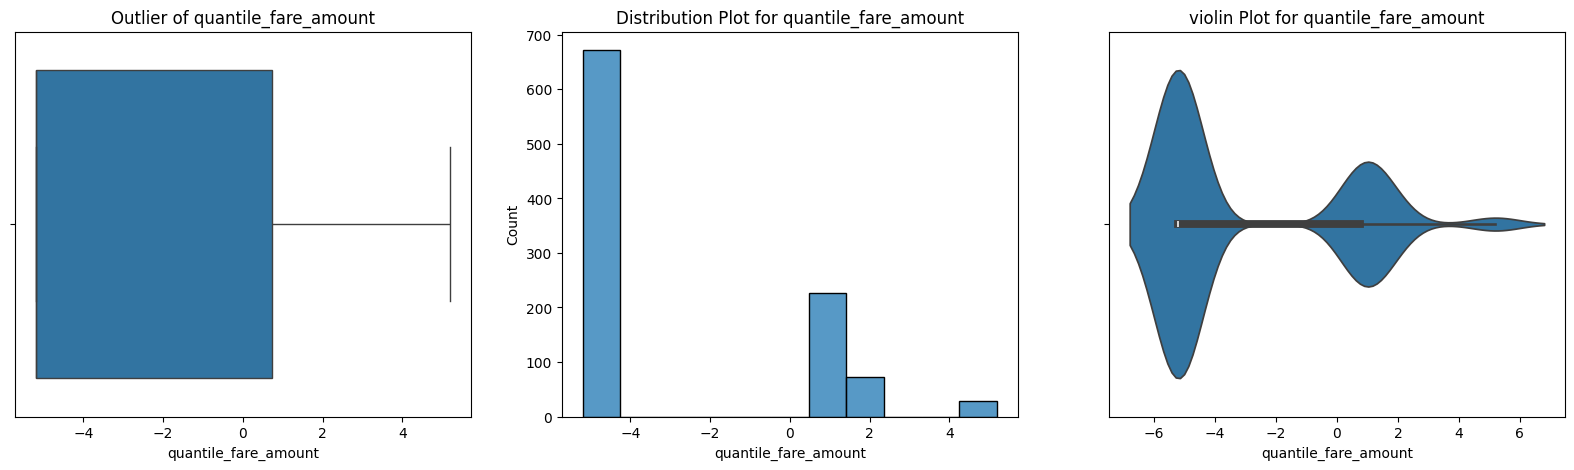

In [264]:
for i in ["passenger_count","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

from the above conclusion is says that log transform is good to handle skweness

In [267]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  200000 non-null  float64
 6   dropoff_latitude   200000 non-null  float64
 7   passenger_count    200000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.2+ MB


In [268]:
df3['fare_amount_log'] = np.log(df3['fare_amount'])
df3['passenger_count_log'] = np.log(df3['passenger_count'])

df3

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000


## Before  and After Skwness

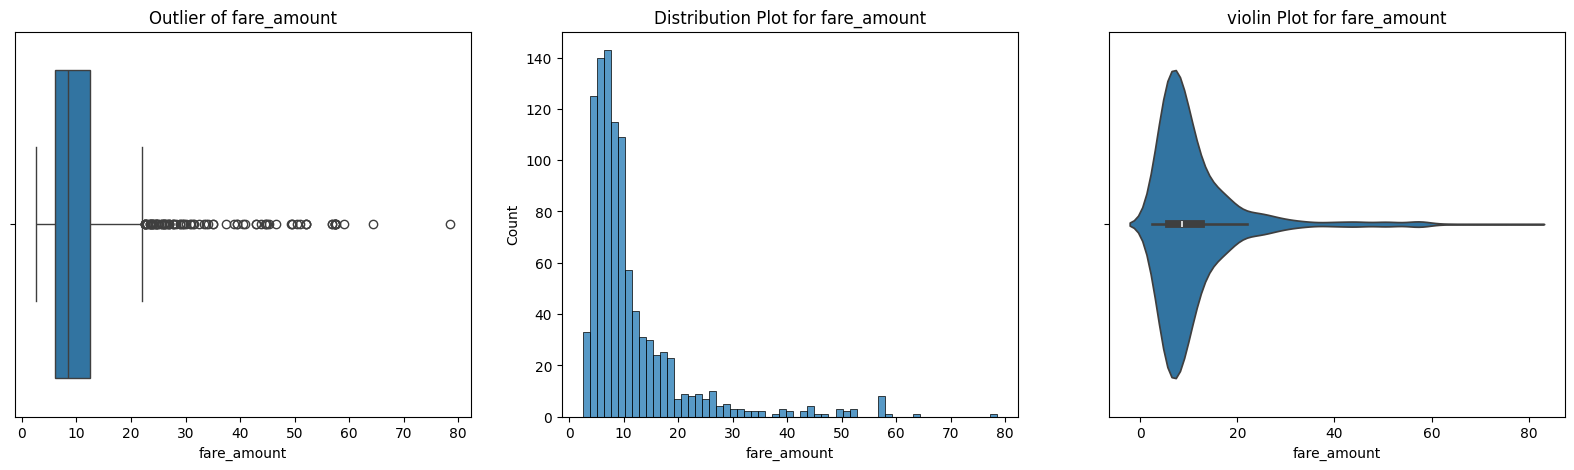

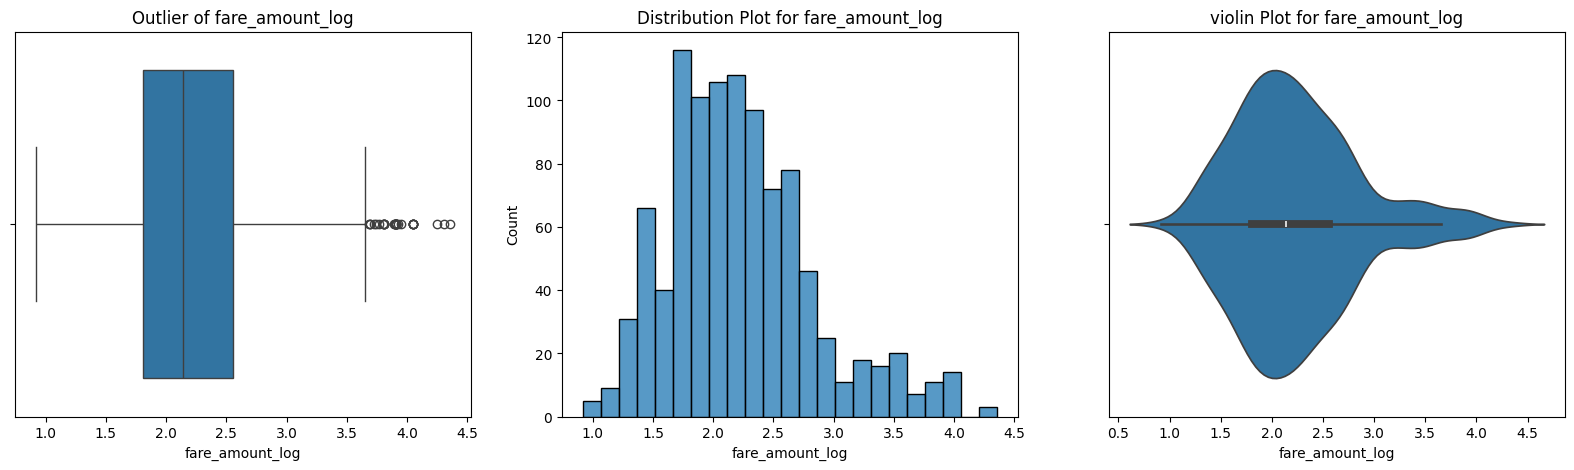

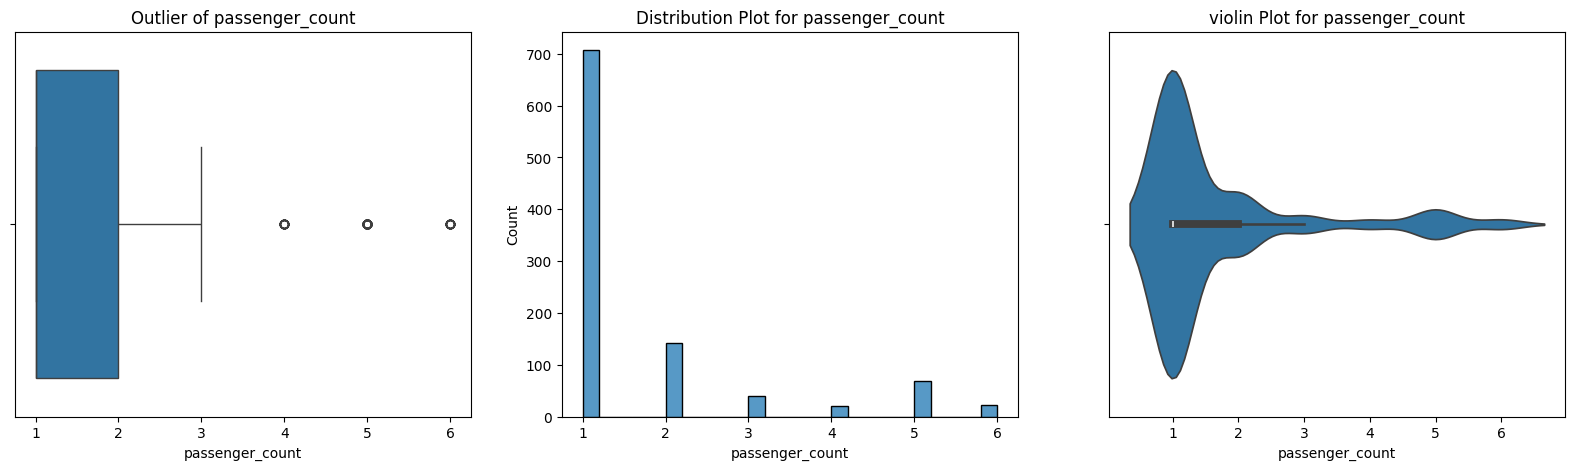

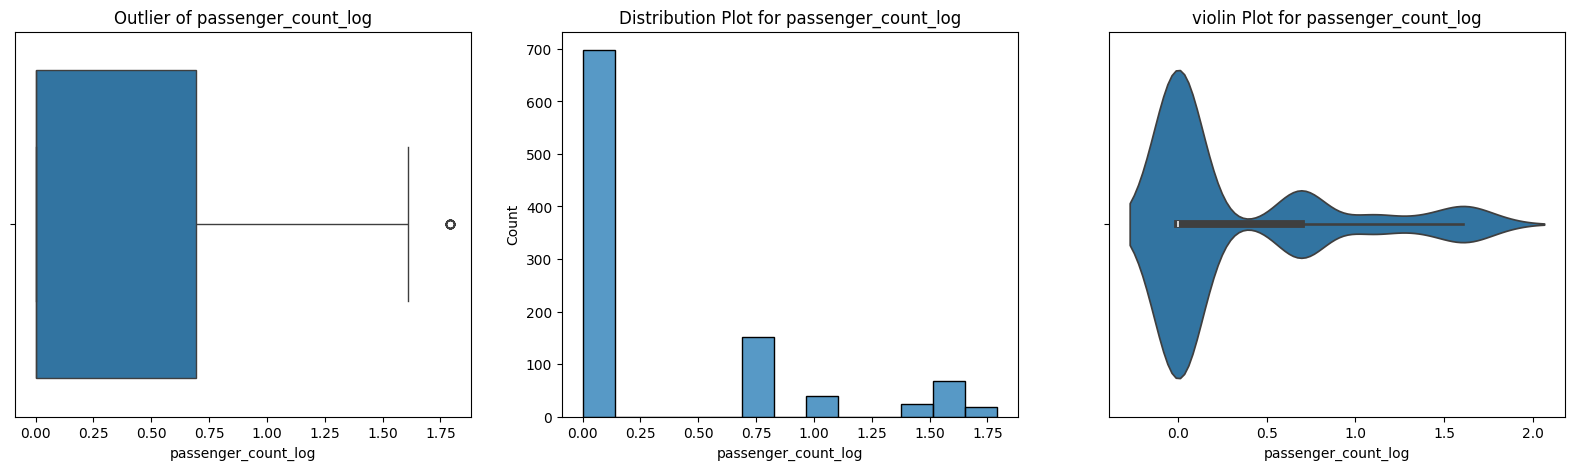

In [269]:
for i in ["fare_amount","fare_amount_log","passenger_count","passenger_count_log"]:
    plot(df3,i)

# Outliers Handling - Interquartile Range (IQR) method

In [282]:
df_out=df3.copy()
df_out

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000


In [283]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           200000 non-null  int64  
 1   fare_amount          200000 non-null  float64
 2   pickup_datetime      200000 non-null  object 
 3   pickup_longitude     200000 non-null  float64
 4   pickup_latitude      200000 non-null  float64
 5   dropoff_longitude    200000 non-null  float64
 6   dropoff_latitude     200000 non-null  float64
 7   passenger_count      200000 non-null  float64
 8   fare_amount_log      200000 non-null  float64
 9   passenger_count_log  200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB


In [284]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
["fare_amount","fare_amount_log","passenger_count","passenger_count_log"]

In [285]:
outlier(df_out, 'fare_amount_log')
outlier(df_out, 'passenger_count_log')
df_out

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000


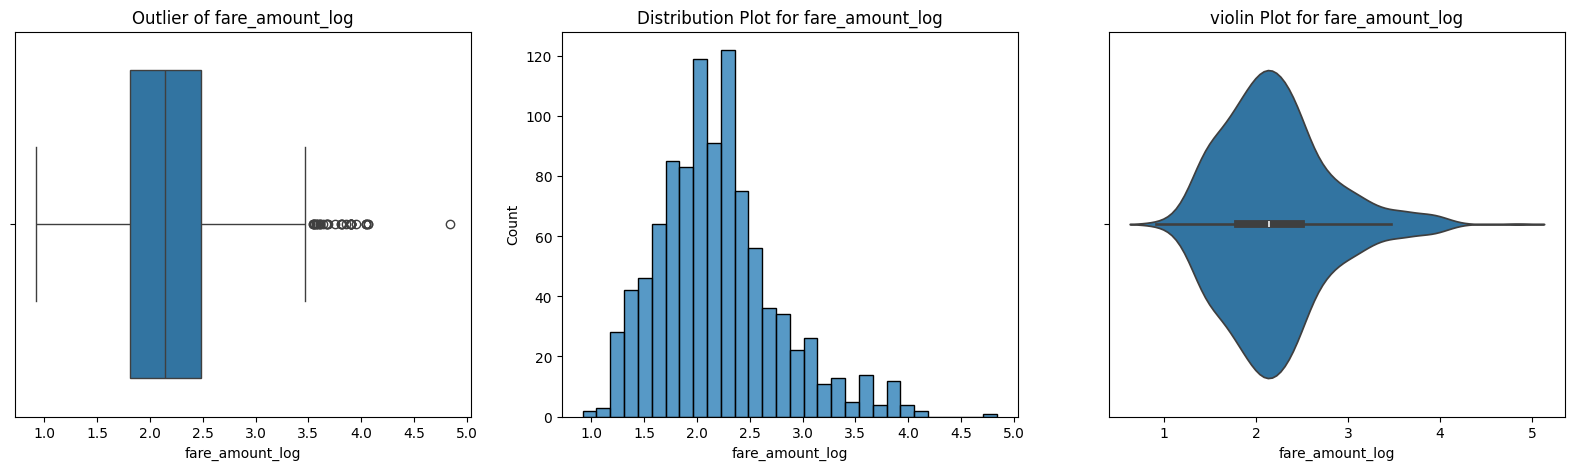

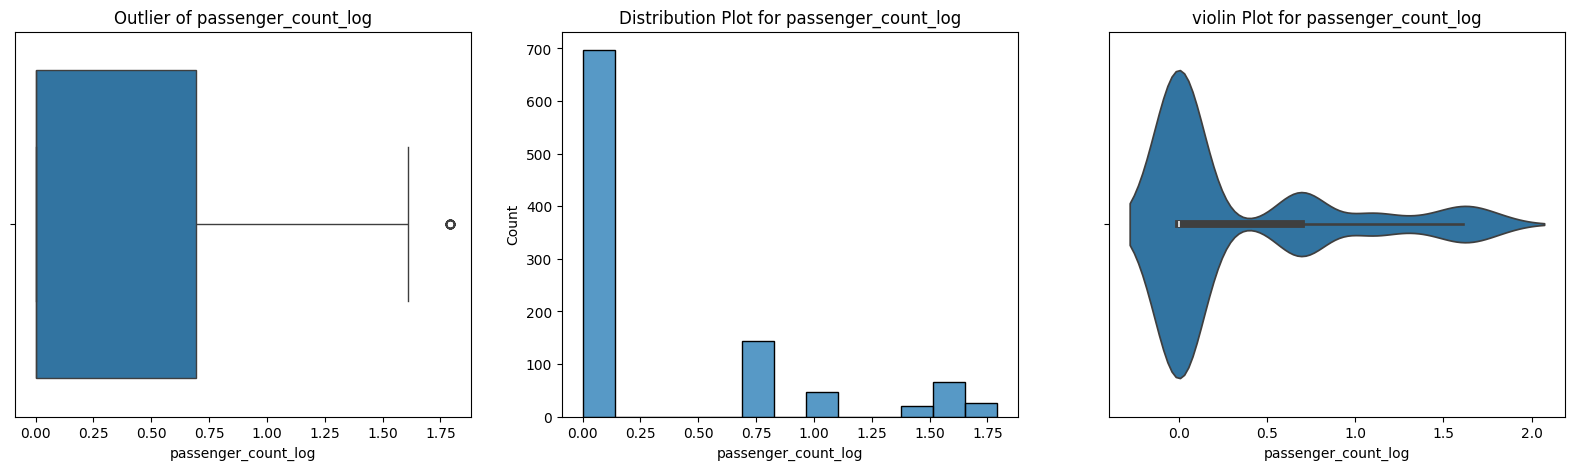

In [287]:
for i in ["fare_amount_log","passenger_count_log"]:
    plot(df3,i)

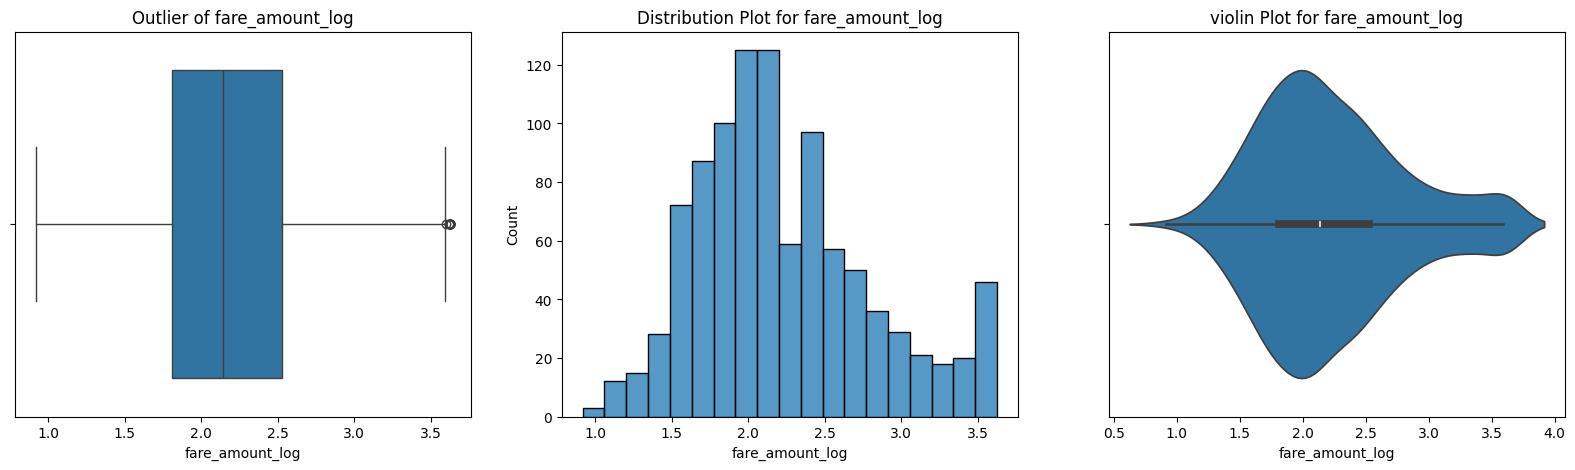

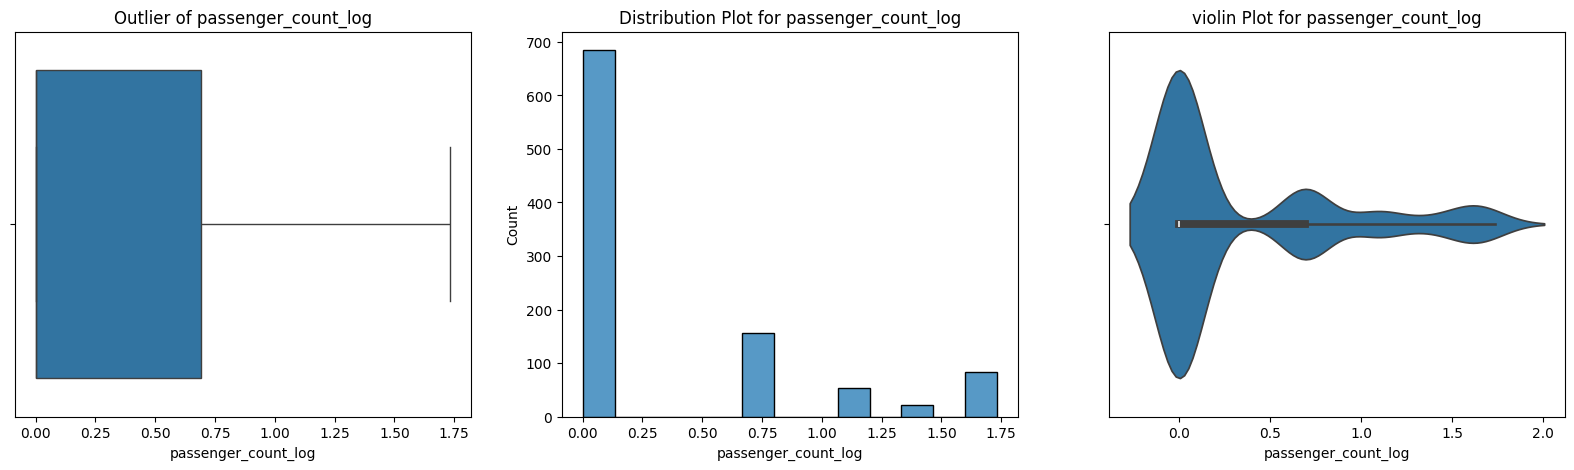

In [288]:
for i in ["fare_amount_log","passenger_count_log"]:
    plot(df_out,i)

In [289]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df_fout = df_out.drop(columns=[])
df_fout

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000


# Highly correlated using Heatmap

In [290]:
import seaborn as sns

<Axes: >

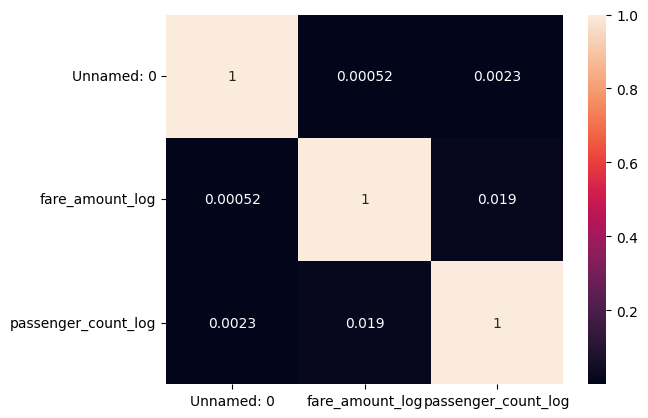

In [293]:

col = ["Unnamed: 0","fare_amount_log","passenger_count_log"]
df_heatmap = df_fout[col].corr()
sns.heatmap(df_heatmap, annot=True)

The highest value is (0.00..) only, So there is no columns are highly correlated and no need to drop any columns.

# Extracting the features


In [295]:
df_fet1=df_fout.copy()
df_fet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           200000 non-null  int64  
 1   fare_amount          200000 non-null  float64
 2   pickup_datetime      200000 non-null  object 
 3   pickup_longitude     200000 non-null  float64
 4   pickup_latitude      200000 non-null  float64
 5   dropoff_longitude    200000 non-null  float64
 6   dropoff_latitude     200000 non-null  float64
 7   passenger_count      200000 non-null  float64
 8   fare_amount_log      200000 non-null  float64
 9   passenger_count_log  200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB


In [300]:
df_fet1['pickup_datetime']=pd.to_datetime(df_fet1['pickup_datetime'])

df_fet1['year']=df_fet1['pickup_datetime'].dt.year
df_fet1['month']=df_fet1['pickup_datetime'].dt.month
df_fet1['day']=df_fet1['pickup_datetime'].dt.day
df_fet1['time']=df_fet1['pickup_datetime'].dt.time

In [303]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    return c * r

# Calculate the distance and add it as a new column
df_fet1['distance_km'] = df_fet1.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)




In [316]:
#df_fet1['time'] = pd.to_datetime(df_fet1['pickup_datetime']).dt.time

# Extract the hour from the datetime object
df_fet1['hour'] = df_fet1['pickup_datetime'].dt.hour

# Define a function to segment time of day
def segment_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create a new column for time of day
df_fet1['time_of_day'] = df_fet1['hour'].apply(segment_time_of_day)

In [322]:
def segment_passenger_count(count):
    if count <= 2:
        return 'mini'
    elif 3 <= count <= 4:
        return 'xuv'
    else:
        return 'premium xuv'

# Apply the function to create a new column for vehicle type
df_fet1['vehicle_type'] = df_fet1['passenger_count'].apply(segment_passenger_count)

In [325]:
#Week onn the Year
df_fet1['week_of_year'] = df_fet1['pickup_datetime'].dt.isocalendar().week


In [326]:
df_fet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Unnamed: 0           200000 non-null  int64              
 1   fare_amount          200000 non-null  float64            
 2   pickup_datetime      200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude     200000 non-null  float64            
 4   pickup_latitude      200000 non-null  float64            
 5   dropoff_longitude    200000 non-null  float64            
 6   dropoff_latitude     200000 non-null  float64            
 7   passenger_count      200000 non-null  float64            
 8   fare_amount_log      200000 non-null  float64            
 9   passenger_count_log  200000 non-null  float64            
 10  year                 200000 non-null  int32              
 11  month                200000 non-null  int32              
 12  da

In [327]:
df_fet1


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log,year,month,day,distance_km,time,hour,time_of_day,vehicle_type,week_of_year
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.000000,2015,5,7,1.683323,19:52:06,19,evening,mini,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.000000,2009,7,17,2.457590,20:04:56,20,evening,mini,29
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.000000,2009,8,24,5.036377,21:45:00,21,night,mini,35
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.667707,1.098612,2009,6,26,1.661683,08:22:21,8,morning,xuv,26
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,2.772589,1.609438,2014,8,28,4.475450,17:47:00,17,evening,premium xuv,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0,1.098612,0.000000,2012,10,28,0.112210,10:49:00,10,morning,mini,43
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0,2.014903,0.000000,2014,3,14,1.875050,01:09:00,1,night,mini,11
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2.0,3.430756,0.693147,2009,6,29,12.850319,00:42:00,0,night,mini,27
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0,2.674149,0.000000,2015,5,20,3.539715,14:56:25,14,afternoon,mini,21


In [307]:
df_fet1["Unnamed: 0"].nunique()

200000

In [308]:
df_fet1["year"].unique()

array([2015, 2009, 2014, 2011, 2012, 2010, 2013], dtype=int32)

In [332]:
df_final=df_fet1.copy()

# Regression Method - Prdict Fare_amount

## Importing Libraries

In [335]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
     

In [337]:
df_final.head(3)

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,passenger_count_log,year,month,day,distance_km,time,hour,time_of_day,vehicle_type,week_of_year
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,2.014903,0.0,2015,5,7,1.683323,19:52:06,19,evening,mini,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.041220,0.0,2009,7,17,2.457590,20:04:56,20,evening,mini,29
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,2.557227,0.0,2009,8,24,5.036377,21:45:00,21,night,mini,35


In [334]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Unnamed: 0           200000 non-null  int64              
 1   fare_amount          200000 non-null  float64            
 2   pickup_datetime      200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude     200000 non-null  float64            
 4   pickup_latitude      200000 non-null  float64            
 5   dropoff_longitude    200000 non-null  float64            
 6   dropoff_latitude     200000 non-null  float64            
 7   passenger_count      200000 non-null  float64            
 8   fare_amount_log      200000 non-null  float64            
 9   passenger_count_log  200000 non-null  float64            
 10  year                 200000 non-null  int32              
 11  month                200000 non-null  int32              
 12  da

In [333]:
df_final.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'fare_amount_log', 'passenger_count_log', 'year',
       'month', 'day', 'distance_km', 'time', 'hour', 'time_of_day',
       'vehicle_type', 'week_of_year'],
      dtype='object')

## Selecting the good model

In [342]:
def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count',"fare_amount_log" ,'time', 'time_of_day',
       'vehicle_type',], axis=1)
    y = df['fare_amount']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [ ]:

print(machine_learning_regression(df_final, LinearRegression))
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

In [345]:
x.shape

(421,)